In [13]:
import numpy as np
import mglearn
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib as mlt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 15, style='normal', weight='bold')
fontprop_1 = fm.FontProperties(fname = font_path, size = 11)

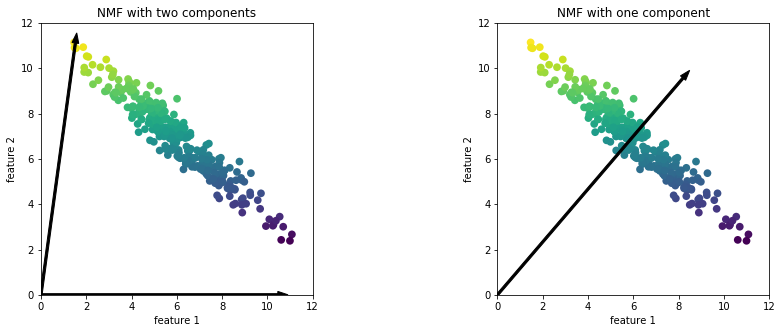

In [4]:
mglearn.plots.plot_nmf_illustration()

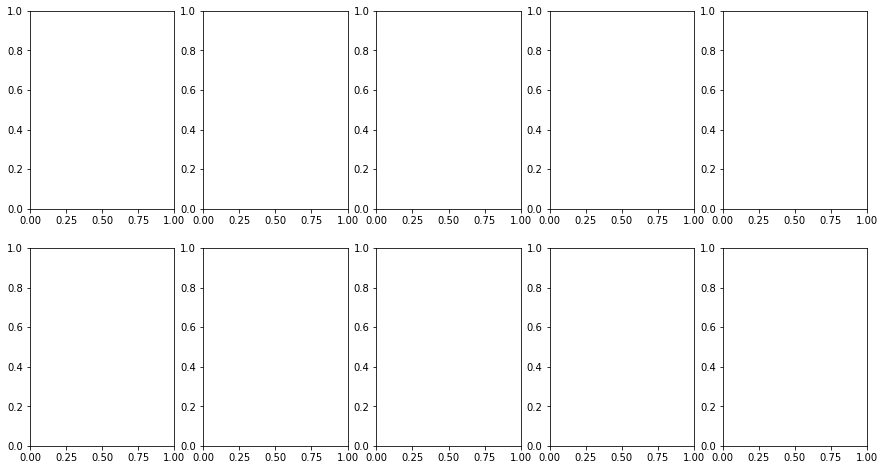

In [17]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

fig, axes = plt.subplots(2, 5 ,figsize = (15, 8))
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1


X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
_____________________________________________________nmf_faces - 810.3s, 13.5min


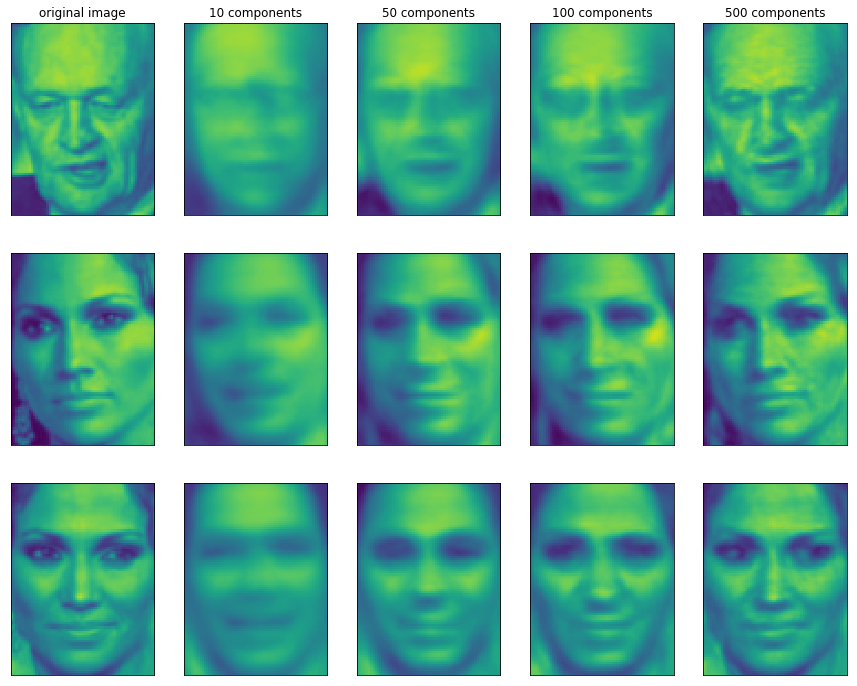

In [18]:
mglearn.plots.plot_nmf_faces(X_train, X_test,image_shape)

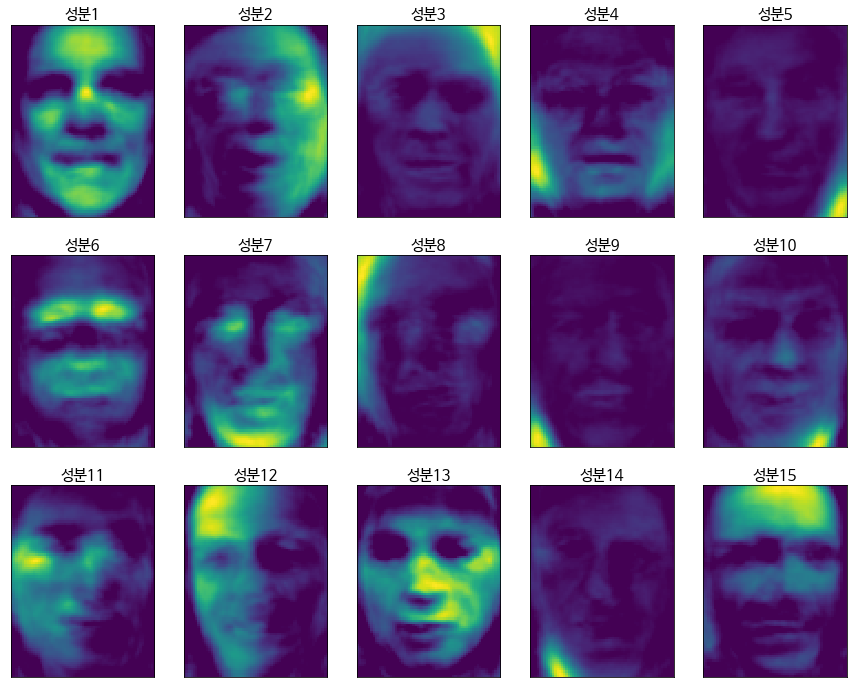

In [30]:
nmf = NMF(n_components = 15, random_state = 0)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.fit_transform(X_test)

fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {"xticks": (), "yticks": ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분{}".format(i+1), fontproperties = fontprop)

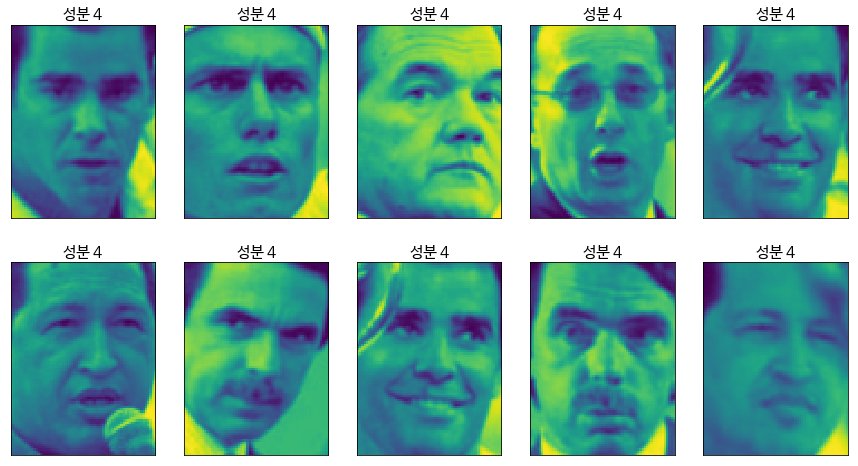

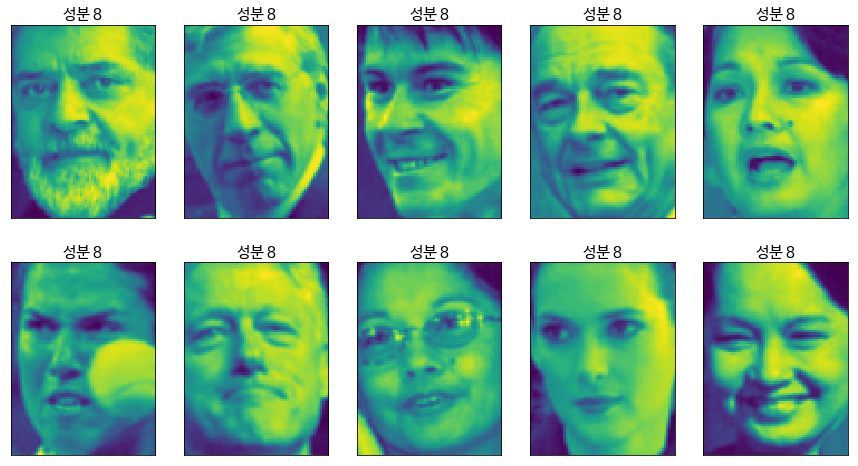

In [37]:
compn = 3

inds = np.argsort(X_train_nmf[:,compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {"xticks": (), "yticks": ()})
for i,(ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    ax.set_title("성분 {}".format(4), fontproperties = fontprop)
    
compn = 7

inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {"xticks": (), "yticks": ()})
for i,(ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    ax.set_title("성분 {}".format(8), fontproperties = fontprop)

Text(0, 0.5, '신호')

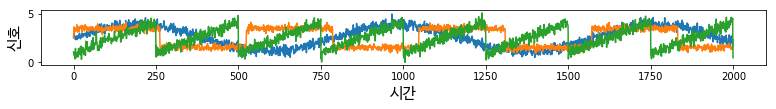

In [9]:
# make sinal with 3 another signal

S = mglearn.datasets.make_signals()
plt.figure(figsize = (13,1))
plt.plot(S, "-")
plt.xlabel("시간", fontproperties = fontprop)
plt.ylabel("신호", fontproperties = fontprop)

In [10]:
# now we want to seperate this 3 signal
# make 100 data from original data

A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)


측정 데이터 형태: (2000, 100)


In [11]:
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: ", S_.shape)

복원한 신호 데이터 형태:  (2000, 3)


In [16]:
pca = PCA(n_components = 3)
H = pca.fit_transform(X)

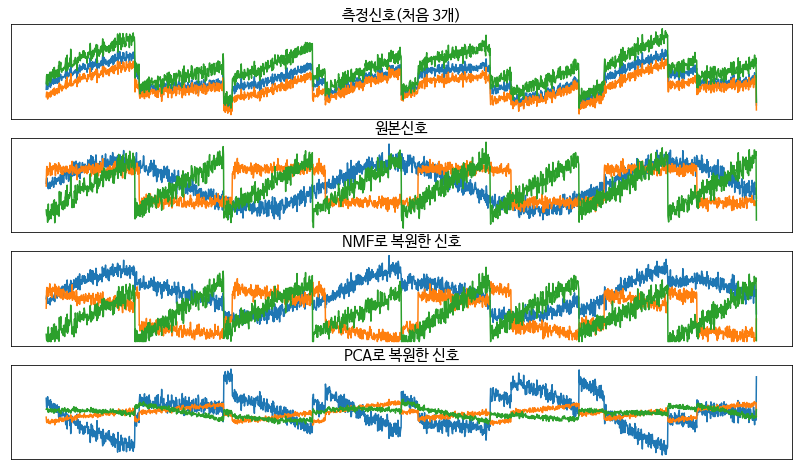

In [40]:
models = [X, S, S_, H]
names = ["측정신호(처음 3개)", "원본신호", "NMF로 복원한 신호", "PCA로 복원한 신호"]

fig, axes = plt.subplots(4, figsize = (14,8), subplot_kw = {"xticks": (), "yticks": ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name, fontproperties = fontprop)
    ax.plot(model[:,:3])